Potrebno je analizirati zadani podatkovni set "cars.csv" koja se nalazi u .zip mapi.

Iscrtajte histogram težine (Weight) po državama i usporedite rezultate. Zapišite kratak zaključak.

Podatkovni set možete preuzeti klikom na dugme "Preuzmi upute", a za rješenje zadatka potrebno je koristiti Visual Studio Code (Jupyter Notebook).

Rješenje zadatka pohranite i prenesite na ispitnu platformu u formatu .zip datoteke.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from os import path as os_path
from sys import path as sys_path

In [4]:
file_path = os_path.join(sys_path[0],'cars.csv')
df = pd.read_csv(file_path,delimiter=';')
df = df.iloc[1:,:]
df

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
403,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
405,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


In [6]:
# čišćenje podataka - konverzija težina u int (brisanje točke)
df.loc[:,'Weight'] = df.loc[:,'Weight'].str.strip('.').astype(int)
df['Weight']

1      3504
2      3693
3      3436
4      3433
5      3449
       ... 
402    2790
403    2130
404    2295
405    2625
406    2720
Name: Weight, Length: 406, dtype: object

In [31]:
# prosjek težine po državama:
df_origin = df.groupby(by='Origin')['Weight'].mean()
# df_origin.values
df_origin


Origin
Europe    2431.493151
Japan     2221.227848
US        3372.181818
Name: Weight, dtype: float64

3372.700787401575


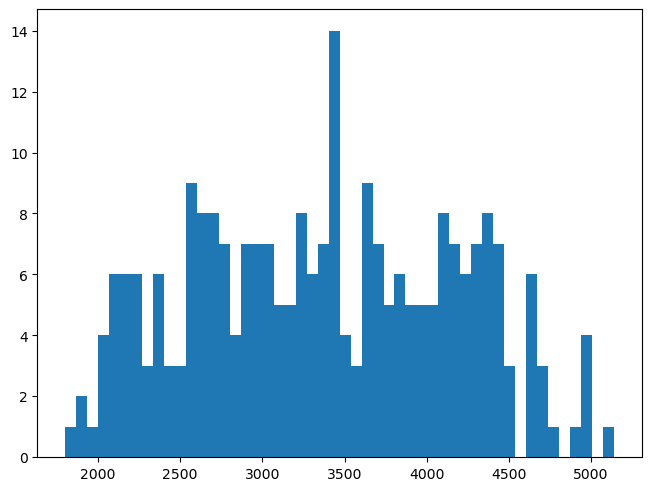

In [9]:
# histogram - težine auta, US
df_US = df[df['Origin']=='US']
fig,ax = plt.subplots(figure=(10,5),layout='constrained')
ax.hist(df_US['Weight'],bins=50)
print(df_US['Weight'].mean())

2221.227848101266


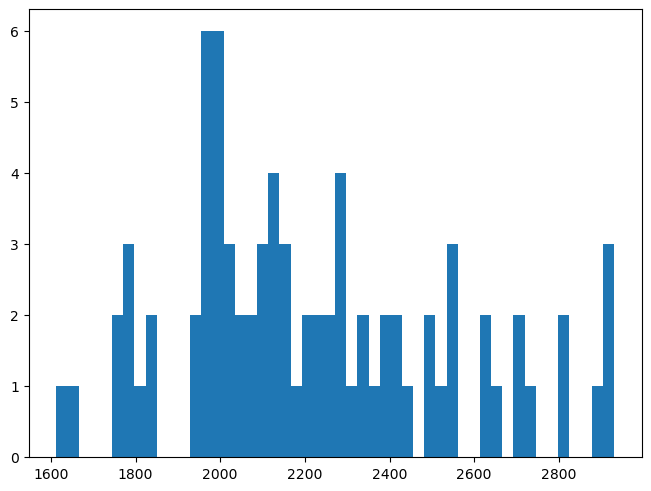

In [10]:
# histogram - težine auta, Japan
df_JPN = df[df['Origin']=='Japan']
fig,ax = plt.subplots(figure=(10,5),layout='constrained')
ax.hist(df_JPN['Weight'],bins=50)
print(df_JPN['Weight'].dropna().mean())

2431.4931506849316


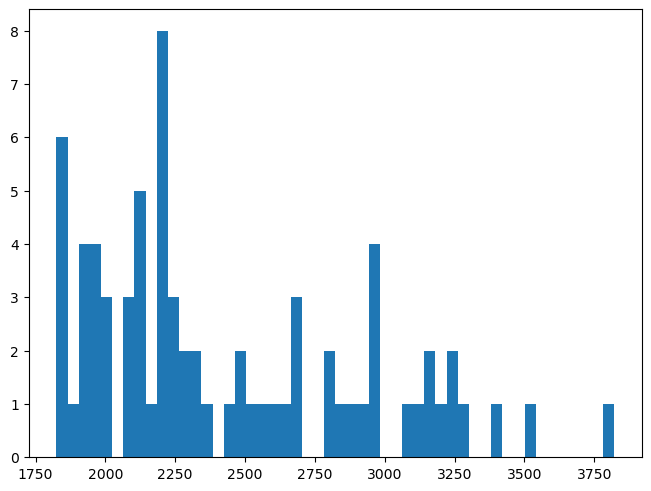

In [11]:
# histogram - težine auta, Europe
df_EU = df[df['Origin']=='Europe']
fig,ax = plt.subplots(figure=(10,5),layout='constrained')
ax.hist(df_EU['Weight'],bins=50)
print(df_EU['Weight'].dropna().mean())

Zaključak:
- prosječna težina auta u US iznosi 3.372, u JPN iznosi 2.221, u EU iznosi 2431
- Amerikanci u prosjeku rade puno teže automobile od Europljana i Japanaca
- Europljani rade nešto teže automobile nego Japanci, razlika je cca 10%
- pretpostavka: Amerikanci rade puno kamiona, džipova i slično
- pretpostavka: japanski automobili su nešto manji nego europski